In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import sklearn
from sklearn.feature_selection import RFE


In [104]:
print(sklearn.__version__)

1.2.2


In [175]:
pd.options.display.float_format = '{:.2f}'.format


In [105]:
pd.set_option("display.max_row", 500)
pd.set_option("display.max_columns", 150)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.precision', 2)

pd.set_option('display.float_format', '{:.2f}'.format)

In [106]:
subcategories_df = pd.read_csv('Data/Subcategories.csv')

In [107]:
#Sales
channel_df = pd.read_csv('Data/Channel_Volume.csv')

In [108]:
#Market size TAM SAM
ms_df = pd.read_csv('Data/Market_Sizes.csv')

In [109]:
#Global Business Operations
gbo_df = pd.read_csv('Data/Company_Share_GBO_unit.csv', delimiter=';')

 Data cleaning and modelling

• Provide an environment (Database if possible) to connect Tableau to

• Answer the following questions

• What Categories/Subcategories are projected to grow the fastest in the next 5 years?

• Within these Categories/Subcategories, what Channels are growing?

• What is Dragonyte’s market position within these fast-growing categories?

• Provide predictions + explanation of the model used

• Give your recommendations to the Dragonyte Board

• Think out of the box! Dare to surprise!

In [110]:
gbo_df.shape

(43336, 11)

In [111]:
ms_df.shape

(1221, 15)

In [112]:
channel_df.shape

(8468, 13)

In [114]:
print(gbo_df.dtypes)


Location              float64
Industry               object
Subcategory_ID        float64
Hierarchy_Level       float64
Data_Type              object
Global_Brand_Owner     object
Unit                   object
Year_text             float64
Year_date              object
Year_minus_2016       float64
Volume                 object
dtype: object


In [115]:
gbo_df.isnull().count()

Location              43336
Industry              43336
Subcategory_ID        43336
Hierarchy_Level       43336
Data_Type             43336
Global_Brand_Owner    43336
Unit                  43336
Year_text             43336
Year_date             43336
Year_minus_2016       43336
Volume                43336
dtype: int64

In [116]:
print(gbo_df.isnull().sum())


Location              21668
Industry              21668
Subcategory_ID        21668
Hierarchy_Level       21668
Data_Type             21668
Global_Brand_Owner    21668
Unit                  21668
Year_text             21668
Year_date             21668
Year_minus_2016       21668
Volume                21668
dtype: int64


In [117]:
print(gbo_df.duplicated().sum())


21667


In [118]:
gbo_df.drop_duplicates(inplace=True)


In [119]:
print(gbo_df.isnull().sum())

Location              1
Industry              1
Subcategory_ID        1
Hierarchy_Level       1
Data_Type             1
Global_Brand_Owner    1
Unit                  1
Year_text             1
Year_date             1
Year_minus_2016       1
Volume                1
dtype: int64


In [120]:
gbo_df = gbo_df.dropna()


In [121]:
print(gbo_df.dtypes)


Location              float64
Industry               object
Subcategory_ID        float64
Hierarchy_Level       float64
Data_Type              object
Global_Brand_Owner     object
Unit                   object
Year_text             float64
Year_date              object
Year_minus_2016       float64
Volume                 object
dtype: object


In [122]:
gbo_df['Volume'] = gbo_df['Volume'].str.replace(',', '.').astype(float)


/var/folders/xp/6bbyd7cd5k39n1yq5vbrzgvr0000gn/T/ipykernel_95785/783816558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbo_df['Volume'] = gbo_df['Volume'].str.replace(',', '.').astype(float)


In [123]:
gbo_df.head()

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
1,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,35506.38
3,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Heineken NV,million litres,2016.00,"Saturday, 31 Dec 2016",4.00,18482.60
5,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Carlsberg A/S,million litres,2016.00,31-12-16,4.00,11121.70
7,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Dragonyte Brewery,million litres,2016.00,31-Dec-16,4.00,6252.38
9,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016.00,31 12 2016,4.00,7834.49


In [124]:
print(gbo_df.dtypes)


Location              float64
Industry               object
Subcategory_ID        float64
Hierarchy_Level       float64
Data_Type              object
Global_Brand_Owner     object
Unit                   object
Year_text             float64
Year_date              object
Year_minus_2016       float64
Volume                float64
dtype: object


In [125]:
numerical=gbo_df.select_dtypes(include=np.number)


In [126]:
numerical

,Location,Subcategory_ID,Hierarchy_Level,Year_text,Year_minus_2016,Volume
1,8.00,13.00,1.00,2016.00,4.00,35506.38
3,8.00,13.00,1.00,2016.00,4.00,18482.60
5,8.00,13.00,1.00,2016.00,4.00,11121.70
7,8.00,13.00,1.00,2016.00,4.00,6252.38
9,8.00,13.00,1.00,2016.00,4.00,7834.49
...,...,...,...,...,...,...
43327,8.00,15.00,1.00,2016.00,4.00,223.02
43329,8.00,15.00,1.00,2016.00,4.00,78.56
43331,8.00,15.00,1.00,2016.00,4.00,3.71
43333,8.00,15.00,1.00,2016.00,4.00,307.77


In [127]:
gbo_df.head(10)

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
1,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,35506.38
3,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Heineken NV,million litres,2016.00,"Saturday, 31 Dec 2016",4.00,18482.60
5,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Carlsberg A/S,million litres,2016.00,31-12-16,4.00,11121.70
7,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Dragonyte Brewery,million litres,2016.00,31-Dec-16,4.00,6252.38
9,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016.00,31 12 2016,4.00,7834.49
11,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Asahi Group Holdings Ltd,million litres,2016.00,31 12 2016,4.00,2446.94
13,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Beijing Yanjing Brewery Co Ltd,million litres,2016.00,31 12 2016,4.00,5373.66
15,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Kirin Holdings Co Ltd,million litres,2016.00,"Sat, 31 December 2016",4.00,4770.92
17,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,Diageo Plc,million litres,2016.00,31-Dec-16,4.00,1926.57
19,8.00,Alcoholic Drinks,13.00,1.00,Total Volume,San Miguel Corp,million litres,2016.00,31-12-16,4.00,1549.13


In [128]:
gbo_df['Unit'].unique()


array(['million litres', '000 litres'], dtype=object)

In [129]:
gbo_df.shape

(21668, 11)

In [130]:
mask = gbo_df['Unit'] == 'million litres'
mask.sum()

15330

In [131]:
mask2 = gbo_df['Unit'] != 'million litres'
mask2.sum()


6338

In [132]:
gbo_df.loc[gbo_df['Unit'] == 'million litres', 'Volume'] *= 1000000
gbo_df.loc[gbo_df['Unit'] != 'million litres', 'Volume'] *= 1000

In [133]:
df = pd.merge(subcategories_df, gbo_df, left_on='id', right_on='Subcategory_ID', suffixes=('_sub', '_gbo'))


In [134]:
has_value_13 = 13.00 in df['Subcategory_ID'].values


In [135]:
has_value_13

True

In [136]:
df.head(5)

,id,Category,Name,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
0,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,442793084.90
1,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2017.00,"Sun, 31 December 2017",5.00,444884185.90
2,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2018.00,31-12-18,6.00,452345228.70
3,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2019.00,31 12 2019,7.00,454854091.10
4,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2020.00,31-Dec-20,8.00,488652519.60


In [137]:
df.shape

(21668, 14)

In [138]:
ms_df['Subcategory'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [139]:
df = pd.merge(df, ms_df, left_on='id', right_on='Subcategory',suffixes=('_df', '_ms'))


In [140]:
df.shape

(1598443, 29)

In [141]:
df['Name'].unique()

array(['Ale', 'Weissbier/Weizen/Wheat Beer', 'Flavoured/Mixed Lager',
       'Standard Lager', 'Sorghum', 'Stout', 'Non Alcoholic Beer',
       'Lager', 'Dark Beer', 'Premium Lager', 'Mid-Priced Lager',
       'Economy Lager', 'Beer', 'Wine', 'Spirits',
       'RTDs/High-Strength Premixes', 'Cider/Perry'], dtype=object)

In [142]:
channel_df['Subcategory'].unique()

array(['Beer', 'Cider/Perry', 'RTDs/High-Strength Premixes', 'Spirits',
       'Wine'], dtype=object)

In [143]:
# df = pd.merge(df, channel_df, left_on='id', right_on='Subcategory')


In [144]:
numerical=df.select_dtypes(include=np.number)
numerical.shape

(1598443, 17)

In [145]:
categorical = df.select_dtypes(include=['object', 'category'])
categorical.shape

(1598443, 12)

In [146]:
df.head(5)

,id,Category,Name,Location_df,Industry_df,Subcategory_ID,Hierarchy_Level_df,Data_Type_df,Global_Brand_Owner,Unit_df,Year_text,Year_date_df,Year_minus_2016_df,Volume_df,Location_ms,Industry_ms,Subcategory,Hierarchy_Level_ms,Data_Type_ms,Unit_ms,Current_Constant,Currency_Conversion,Year,Year_date_ms,RSP,Volume_ms,Year_minus_2016_ms,Year_minus_2022,Edition
0,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,442793084.90,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2016,31-Dec-16,301.00,27.00,4,-2,2022
1,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,442793084.90,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2017,31-Dec-17,318.00,28.00,5,-1,2022
2,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,442793084.90,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2018,31-Dec-18,458.00,40.00,6,0,2022
3,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,442793084.90,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2019,31-Dec-19,612.00,51.00,7,1,2022
4,1,1,Ale,8.00,Alcoholic Drinks,1.00,3.00,Total Volume,Anheuser-Busch InBev NV,million litres,2016.00,31-12-16,4.00,442793084.90,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2020,31-Dec-20,774.00,62.00,8,2,2022


In [147]:
# Calculate the correlation matrix
"""cor = numerical.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Matrix')
plt.show()"""

"cor = numerical.corr()\n\n# Plot the correlation matrix heatmap\nplt.figure(figsize=(18, 10))\nsns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)\nplt.title('Correlation Matrix')\nplt.show()"

<Axes: >

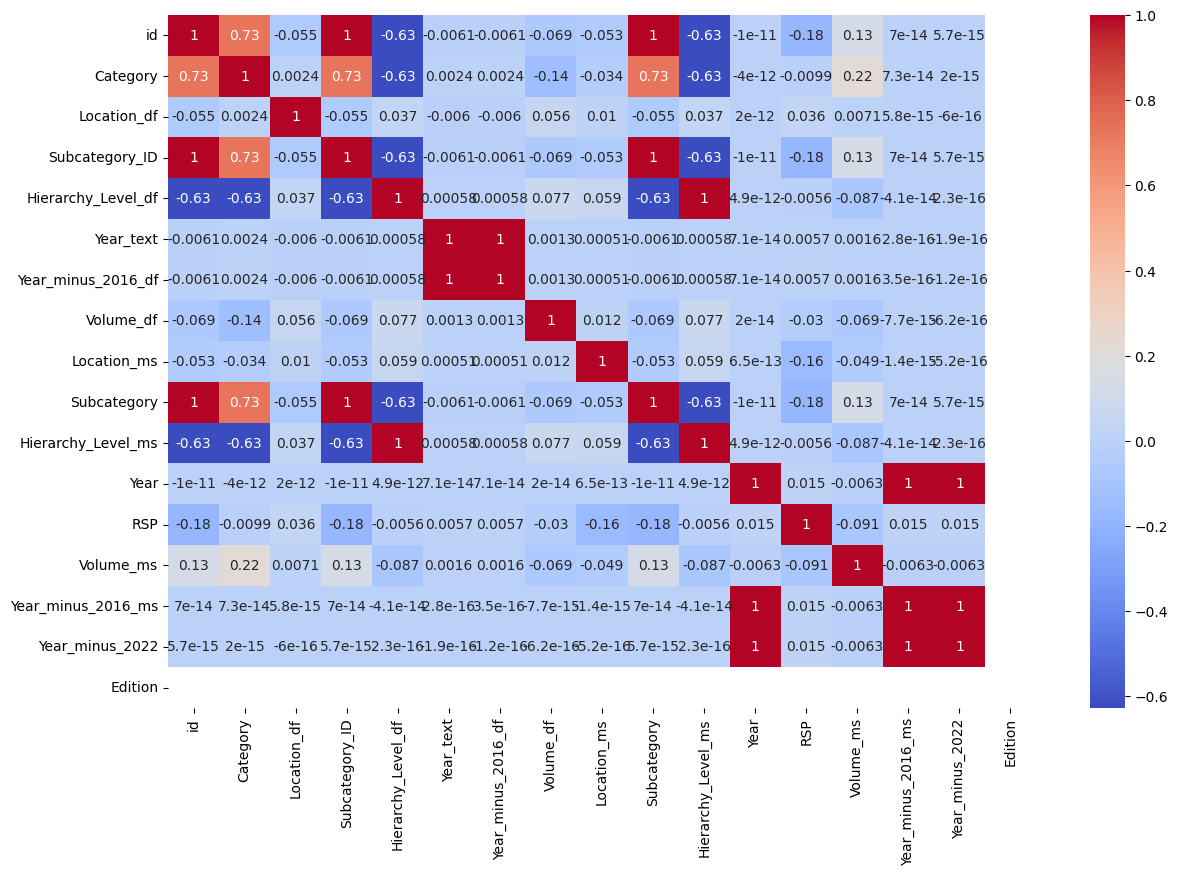

In [179]:

corr = numerical.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [148]:
df.columns

Index(['id', 'Category', 'Name', 'Location_df', 'Industry_df',
       'Subcategory_ID', 'Hierarchy_Level_df', 'Data_Type_df',
       'Global_Brand_Owner', 'Unit_df', 'Year_text', 'Year_date_df',
       'Year_minus_2016_df', 'Volume_df', 'Location_ms', 'Industry_ms',
       'Subcategory', 'Hierarchy_Level_ms', 'Data_Type_ms', 'Unit_ms',
       'Current_Constant', 'Currency_Conversion', 'Year', 'Year_date_ms',
       'RSP', 'Volume_ms', 'Year_minus_2016_ms', 'Year_minus_2022', 'Edition'],
      dtype='object')

In [149]:
df['Year'].max()

2026

In [157]:
X = numerical.drop("RSP",axis=1)   #Feature Matrix
y = numerical["RSP"] 


In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((1278754, 16), (319689, 16))

In [160]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)


ExtraTreesRegressor()

In [161]:
print(model.feature_importances_)


[7.62250599e-02 2.67742529e-02 4.81088857e-15 6.61786797e-02
 1.43403989e-02 4.15500062e-15 3.54153683e-15 1.55639676e-04
 2.84970583e-01 6.98528125e-02 1.21969665e-02 4.33467953e-02
 3.25715335e-01 3.99403633e-02 4.03031136e-02 0.00000000e+00]


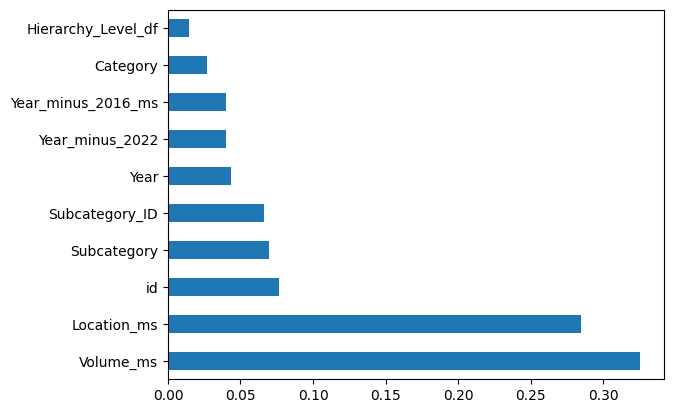

In [162]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [217]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [213]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [216]:
for column in constant_columns:
    print(column)

Edition


In [218]:
X_train.drop(constant_columns,axis=1, inplace=True)

In [220]:
X_train.columns

Index(['id', 'Category', 'Location_df', 'Subcategory_ID', 'Hierarchy_Level_df',
       'Year_text', 'Year_minus_2016_df', 'Volume_df', 'Location_ms',
       'Subcategory', 'Hierarchy_Level_ms', 'Year', 'Volume_ms',
       'Year_minus_2016_ms', 'Year_minus_2022'],
      dtype='object')

In [230]:
X_train.drop(columns=['Year_minus_2016_ms', 'Year_minus_2022'])

,id,Category,Location_df,Subcategory_ID,Hierarchy_Level_df,Year_text,Year_minus_2016_df,Volume_df,Location_ms,Subcategory,Hierarchy_Level_ms,Year,Volume_ms
237058,4,1,3.00,4.00,3.00,2020.00,8.00,118543344.40,5,4,3,2024,15.18
1499140,16,4,8.00,16.00,1.00,2017.00,5.00,4350.21,3,16,1,2021,158.00
580462,9,1,2.00,9.00,2.00,2016.00,4.00,1036189.19,1,9,2,2019,240.00
1207026,15,3,1.00,15.00,1.00,2017.00,5.00,77691.76,1,15,1,2023,13.15
287881,4,1,5.00,4.00,3.00,2017.00,5.00,82950662.67,6,4,3,2016,23.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,3,1,7.00,3.00,3.00,2021.00,9.00,59980246.77,1,3,3,2025,130.00
963395,14,2,1.00,14.00,1.00,2017.00,5.00,19260000.16,5,14,1,2020,1.20
117952,2,1,1.00,2.00,3.00,2021.00,9.00,20669974.68,6,2,3,2026,776.00
1484405,16,4,8.00,16.00,1.00,2020.00,8.00,44754.73,7,16,1,2026,502.00


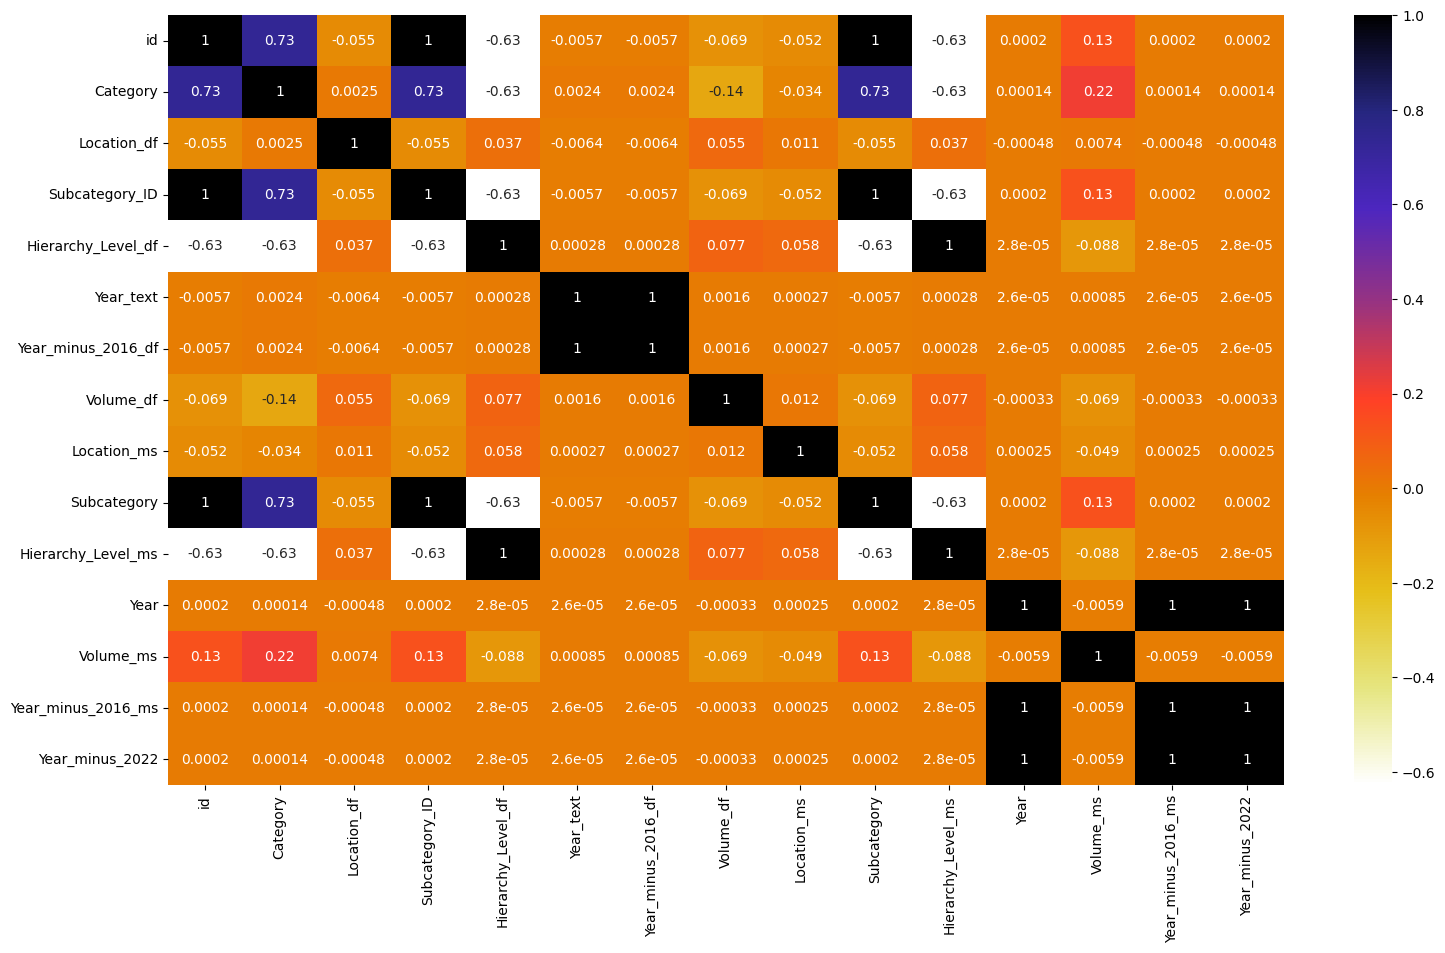

In [219]:
X_train.corr()
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

<Axes: xlabel='RSP', ylabel='Count'>

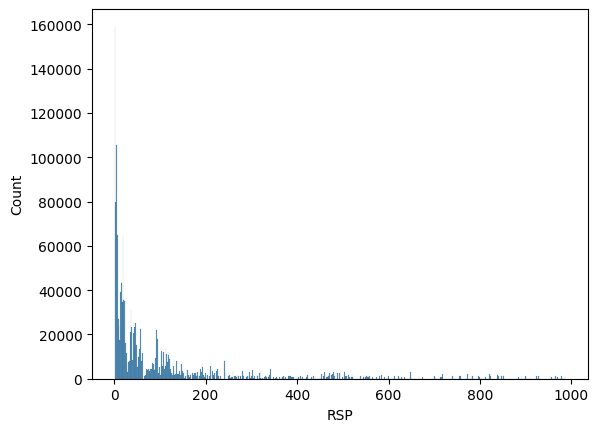

In [172]:
sns.histplot(df['RSP'])


In [189]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_


selector.ranking_



array([4, 1, 6, 2, 1, 1, 1, 1, 5, 3])

In [206]:
X_train.columns[selector.support]



AttributeError: 'RFE' object has no attribute 'support'

In [201]:
type(numerical)

pandas.core.frame.DataFrame

In [199]:
for i, col in enumerate(range(X.shape[1])):
    print(f"Column {col} selected={selector.support_[i]} rank={selector.ranking_[i]}")


Column 0 selected=False rank=4
Column 1 selected=True rank=1
Column 2 selected=False rank=6
Column 3 selected=False rank=2
Column 4 selected=True rank=1
Column 5 selected=True rank=1
Column 6 selected=True rank=1
Column 7 selected=True rank=1
Column 8 selected=False rank=5
Column 9 selected=False rank=3


In [198]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
numerical.head()

,id,Category,Location_df,Subcategory_ID,Hierarchy_Level_df,Year_text,Year_minus_2016_df,Volume_df,Location_ms,Subcategory,Hierarchy_Level_ms,Year,RSP,Volume_ms,Year_minus_2016_ms,Year_minus_2022,Edition
0,1,1,8.00,1.00,3.00,2016.00,4.00,442793084.90,1,1,3,2016,301.00,27.00,4,-2,2022
1,1,1,8.00,1.00,3.00,2016.00,4.00,442793084.90,1,1,3,2017,318.00,28.00,5,-1,2022
2,1,1,8.00,1.00,3.00,2016.00,4.00,442793084.90,1,1,3,2018,458.00,40.00,6,0,2022
3,1,1,8.00,1.00,3.00,2016.00,4.00,442793084.90,1,1,3,2019,612.00,51.00,7,1,2022
4,1,1,8.00,1.00,3.00,2016.00,4.00,442793084.90,1,1,3,2020,774.00,62.00,8,2,2022


In [ ]:
categorical.head()

,Name,Industry_df,Data_Type_df,Global_Brand_Owner,Unit_df,Year_date_df,Industry_ms,Data_Type_ms,Unit_ms,Current_Constant,Currency_Conversion,Year_date_ms
0,Ale,Alcoholic Drinks,Total Volume,Anheuser-Busch InBev NV,million litres,31-12-16,Alcoholic Drinks,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",31-Dec-16
1,Ale,Alcoholic Drinks,Total Volume,Anheuser-Busch InBev NV,million litres,31-12-16,Alcoholic Drinks,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",31-Dec-17
2,Ale,Alcoholic Drinks,Total Volume,Anheuser-Busch InBev NV,million litres,31-12-16,Alcoholic Drinks,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",31-Dec-18
3,Ale,Alcoholic Drinks,Total Volume,Anheuser-Busch InBev NV,million litres,31-12-16,Alcoholic Drinks,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",31-Dec-19
4,Ale,Alcoholic Drinks,Total Volume,Anheuser-Busch InBev NV,million litres,31-12-16,Alcoholic Drinks,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",31-Dec-20
